# ATLANTA ARRESTS RECORDS FOR THE PAST DECADE
# 2009-2019

#### Loading libraries 

In [1]:
!pip install plotly

In [2]:
#Import different libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import seaborn as sns

# Plotly imports
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot

from scipy import stats 
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy.stats import chisquare
from scipy.stats import normaltest
from scipy.stats import ks_2samp

#### Loading Directories

In [3]:
# #Loading files
# from google.colab import files
# upload = files.upload()

Initially, I was working with this file locally. I was able to use command line to push the file to github (after installing their large file package - git lfs)

Links:
1. https://help.github.com/en/github/authenticating-to-github/adding-a-new-ssh-key-to-your-github-account
2. https://help.github.com/en/github/managing-large-files/working-with-large-files
3. https://git-lfs.github.com/
4. https://github.com/git-lfs/git-lfs/releases/tag/v2.10.0

In [4]:
url = "https://raw.githubusercontent.com/jiobu1/DS-Unit-1-Sprint-4-Data-Storytelling-Portfolio-Project/master/COBRA-2009-2019.csv"

In [5]:
arrests = pd.read_csv(url)
                    
#did not pass through dtype becasue this deleted a lot of the information

/Users/jisha/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.



#### Exploring Data

In [6]:
arrests.shape

(342914, 19)

For the purpose of this project, I excluded columns such as possible dates, possible times, adresses

In [7]:
arrests.head()

Report Number Report Date  Occur Date Occur Time Possible Date  \
0       90010930  2009-01-01  2009-01-01       1145    2009-01-01   
1       90011083  2009-01-01  2009-01-01       1330    2009-01-01   
2       90011208  2009-01-01  2009-01-01       1500    2009-01-01   
3       90011218  2009-01-01  2009-01-01       1450    2009-01-01   
4       90011289  2009-01-01  2009-01-01       1600    2009-01-01   

   Possible Time   Beat Apartment Office Prefix Apartment Number  \
0         1148.0  411.0                     NaN              NaN   
1         1330.0  511.0                     NaN              NaN   
2         1520.0  407.0                     NaN              NaN   
3         1510.0  210.0                     NaN              NaN   
4         1700.0  411.0                     NaN              NaN   

                      Location Shift Occurence Location Type  \
0         2841 GREENBRIAR PKWY       Day Watch             8   
1               12 BROAD ST SW       Day Watch             9   
2  3500 MARTIN L KING JR DR SW         Unknown             8   
3         3393 PEACHTREE RD NE   Evening Watch             8   
4      2841 GREENBRIAR PKWY SW         Unknown             8   

           UCR Literal  UCR # IBR Code Neighborhood NPU  Latitude  Longitude  
0  LARCENY-NON VEHICLE    630     2303   Greenbriar   R  33.68845  -84.49328  
1  LARCENY-NON VEHICLE    630     2303     Downtown   M  33.75320  -84.39201  
2  LARCENY-NON VEHICLE    630     2303   Adamsville   H  33.75735  -84.50282  
3  LARCENY-NON VEHICLE    630     2303        Lenox   B  33.84676  -84.36212  
4  LARCENY-NON VEHICLE    630     2303   Greenbriar   R  33.68677  -84.49773

## Data Cleaning

In [8]:
arrests[['UCR #', 'IBR Code']].nunique()

UCR #       52
IBR Code    91
dtype: int64

In [9]:
#Choosing columns
arrests = arrests[['Report Date', 'Occur Date', 'Occur Time',
                   'Beat', 'Location', 'Shift Occurence', 'Location Type', 
                   'UCR Literal', 'UCR #', 'IBR Code', 'Neighborhood', 'NPU', 
                   'Latitude','Longitude']]
arrests.head()

Report Date  Occur Date Occur Time   Beat                     Location  \
0  2009-01-01  2009-01-01       1145  411.0         2841 GREENBRIAR PKWY   
1  2009-01-01  2009-01-01       1330  511.0               12 BROAD ST SW   
2  2009-01-01  2009-01-01       1500  407.0  3500 MARTIN L KING JR DR SW   
3  2009-01-01  2009-01-01       1450  210.0         3393 PEACHTREE RD NE   
4  2009-01-01  2009-01-01       1600  411.0      2841 GREENBRIAR PKWY SW   

  Shift Occurence Location Type          UCR Literal  UCR # IBR Code  \
0       Day Watch             8  LARCENY-NON VEHICLE    630     2303   
1       Day Watch             9  LARCENY-NON VEHICLE    630     2303   
2         Unknown             8  LARCENY-NON VEHICLE    630     2303   
3   Evening Watch             8  LARCENY-NON VEHICLE    630     2303   
4         Unknown             8  LARCENY-NON VEHICLE    630     2303   

  Neighborhood NPU  Latitude  Longitude  
0   Greenbriar   R  33.68845  -84.49328  
1     Downtown   M  33.75320  -84.39201  
2   Adamsville   H  33.75735  -84.50282  
3        Lenox   B  33.84676  -84.36212  
4   Greenbriar   R  33.68677  -84.49773

In [10]:
arrests.shape

(342914, 14)

#### Still cleaning data
- Analyzing how many null values are in the dataframe 

In [11]:
arrests.isnull().sum()
#Not sure if I want to delete null functions just yet

Report Date            0
Occur Date             0
Occur Time             0
Beat                  24
Location               2
Shift Occurence        0
Location Type       9216
UCR Literal            0
UCR #                  0
IBR Code             170
Neighborhood       12363
NPU                  139
Latitude               0
Longitude              0
dtype: int64

## Exploration


### - Has crime gone down?



1.   Crime increase/decrease by years
2.   Specific crimes by year
3.   Crime by the time of year




In [12]:
#Parsing dates into years and months

##### Creating New Features

In [13]:
#Using occur date instead of report date or possible date
arrests['Occur Date'].head()

0    2009-01-01
1    2009-01-01
2    2009-01-01
3    2009-01-01
4    2009-01-01
Name: Occur Date, dtype: object

In [14]:
#arrests['Occur Date'] = pd.to_datetime(arrests['Occur Date'], infer_datetime_format=True) This create a SetCopyWarning
arrests['Occur Date'] = arrests['Occur Date'].apply(pd.to_datetime)

In [15]:
arrests['Occur_Year'] = arrests['Occur Date'].dt.year
arrests['Occur_Month'] = arrests['Occur Date'].dt.month

In [16]:
arrests.head()

Report Date Occur Date Occur Time   Beat                     Location  \
0  2009-01-01 2009-01-01       1145  411.0         2841 GREENBRIAR PKWY   
1  2009-01-01 2009-01-01       1330  511.0               12 BROAD ST SW   
2  2009-01-01 2009-01-01       1500  407.0  3500 MARTIN L KING JR DR SW   
3  2009-01-01 2009-01-01       1450  210.0         3393 PEACHTREE RD NE   
4  2009-01-01 2009-01-01       1600  411.0      2841 GREENBRIAR PKWY SW   

  Shift Occurence Location Type          UCR Literal  UCR # IBR Code  \
0       Day Watch             8  LARCENY-NON VEHICLE    630     2303   
1       Day Watch             9  LARCENY-NON VEHICLE    630     2303   
2         Unknown             8  LARCENY-NON VEHICLE    630     2303   
3   Evening Watch             8  LARCENY-NON VEHICLE    630     2303   
4         Unknown             8  LARCENY-NON VEHICLE    630     2303   

  Neighborhood NPU  Latitude  Longitude  Occur_Year  Occur_Month  
0   Greenbriar   R  33.68845  -84.49328        2009            1  
1     Downtown   M  33.75320  -84.39201        2009            1  
2   Adamsville   H  33.75735  -84.50282        2009            1  
3        Lenox   B  33.84676  -84.36212        2009            1  
4   Greenbriar   R  33.68677  -84.49773        2009            1

In [17]:
arrests.describe()

Beat          UCR #       Latitude      Longitude  \
count  342890.000000  342914.000000  342914.000000  342914.000000   
mean      365.391277     594.856463      33.757281     -84.407407   
std       170.580194     111.848817       0.044930       0.047112   
min         0.000000     110.000000      33.637500     -84.550500   
25%       209.000000     511.000000      33.730310     -84.432130   
50%       402.000000     640.000000      33.756670     -84.396360   
75%       507.000000     670.000000      33.781830     -84.373470   
max       614.000000     730.000000      33.886130     -84.286410   

          Occur_Year    Occur_Month  
count  342914.000000  342914.000000  
mean     2013.555565       6.690328  
std         3.206291       3.388079  
min      1916.000000       1.000000  
25%      2011.000000       4.000000  
50%      2013.000000       7.000000  
75%      2016.000000      10.000000  
max      2019.000000      12.000000

In [18]:
arrests.describe(exclude = 'number')

Report Date           Occur Date  Occur Time                Location  \
count       342914               342914    342914.0                  342912   
unique        4017                 4186      2840.0                   97455   
top     2009-11-17  2011-08-01 00:00:00      1200.0  1801 HOWELL MILL RD NW   
freq           170                  159     11242.0                    2539   
first          NaN  1916-01-07 00:00:00         NaN                     NaN   
last           NaN  2019-12-31 00:00:00         NaN                     NaN   

       Shift Occurence Location Type           UCR Literal IBR Code  \
count           342914        333698                342914   342744   
unique               4            91                    11       91   
top      Evening Watch            20  LARCENY-FROM VEHICLE     2305   
freq            145812         68613                105630    91718   
first              NaN           NaN                   NaN      NaN   
last               NaN           NaN                   NaN      NaN   

       Neighborhood     NPU  
count        330551  342775  
unique          243      25  
top        Downtown       M  
freq          25386   42179  
first           NaN     NaN  
last            NaN     NaN

/Users/jisha/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

/Users/jisha/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



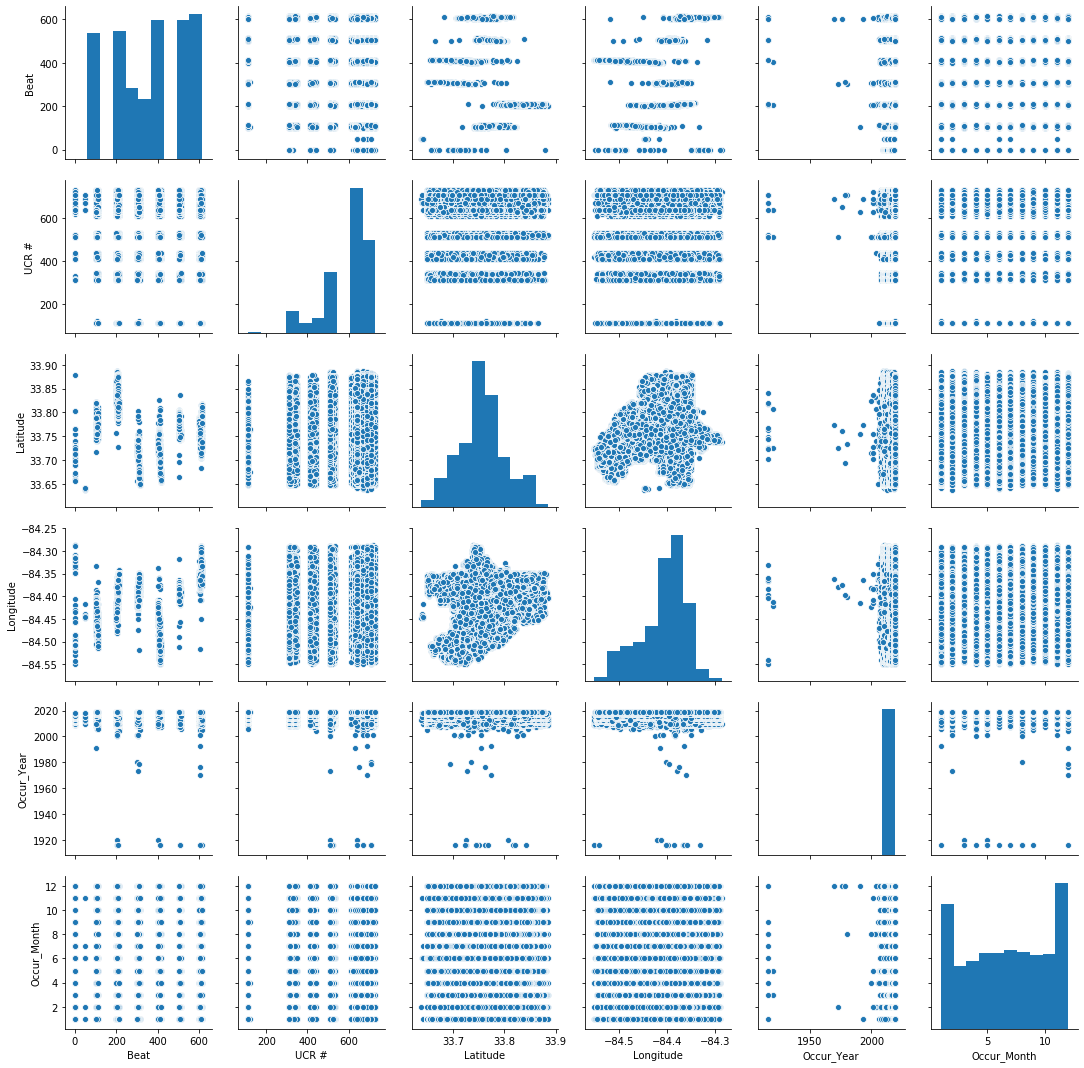

In [19]:
sns.pairplot(arrests)

### Crime increase/decrease by years

In [20]:
# Not including 2020 
year = arrests['Occur_Year'].value_counts()[:11].to_dict()
year

{2009: 39326,
 2010: 35529,
 2011: 34852,
 2012: 33382,
 2013: 32398,
 2014: 31115,
 2015: 30058,
 2016: 29006,
 2017: 26386,
 2018: 25611,
 2019: 24853}

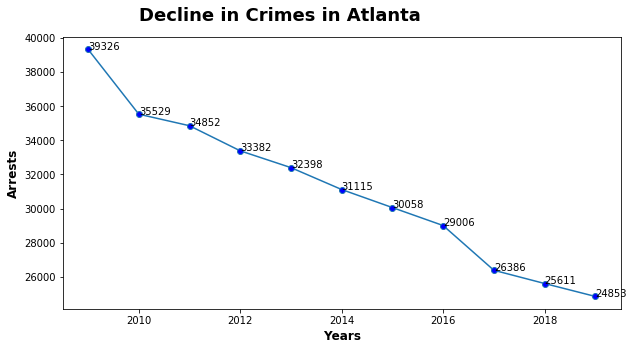

In [21]:
# sorted by key, return a list of tuples
lists = sorted(year.items()) 

# unpack a list of pairs into two tuples
x, y = zip(*lists) 

# fig size
fig, ax = plt.subplots(figsize = (10, 5))
fig.facecolor = 'white'

# graphing line
plt.plot(x, y, marker = 'o', markerfacecolor='blue')

# labeling graph
plt.text (x = 2010, 
          y = 41000, 
          s = 'Decline in Crimes in Atlanta', 
          fontsize = 18, 
          fontweight = 'bold')

plt.xlabel('Years', fontsize = 12, fontweight = 'bold')
plt.ylabel('Arrests', fontsize = 12, fontweight = 'bold')

# labeling data
for i, txt in enumerate(y):
    plt.annotate(txt, (x[i], y[i]))

plt.show()

From this graph we can see that overall crime has been down but does this reflect across the board for crimes, or are some crimes becoming more or less prevalent?

### - Have specific crimes gone down?

#### Has all crime been declining?

In [22]:
arrests['UCR Literal'].value_counts()

LARCENY-FROM VEHICLE    105630
LARCENY-NON VEHICLE      81942
BURGLARY-RESIDENCE       49577
AUTO THEFT               47067
AGG ASSAULT              25049
ROBBERY-PEDESTRIAN       17167
BURGLARY-NONRES          10950
ROBBERY-COMMERCIAL        2317
ROBBERY-RESIDENCE         2230
HOMICIDE                   982
MANSLAUGHTER                 3
Name: UCR Literal, dtype: int64

In [23]:
#Calculating  specific crimes by years
crime_year = pd.crosstab(arrests['Occur_Year'], arrests['UCR Literal'])

crime_year  = crime_year.drop([1916, 1920, 1970, 1973, 1976,1979, 1980, 1991, 
                 1993, 2000, 2001, 2003, 2004, 2005, 2006, 2007,2008])

crime_year

UCR Literal  AGG ASSAULT  AUTO THEFT  BURGLARY-NONRES  BURGLARY-RESIDENCE  \
Occur_Year                                                                  
2009                2613        5625             1682                7393   
2010                2612        4996             1272                6713   
2011                2536        5205              996                6408   
2012                2521        5098              825                5326   
2013                2275        4483              971                4976   
2014                2238        4142             1030                4436   
2015                2156        4236              863                3921   
2016                2193        3849              976                3400   
2017                2036        3195              765                2629   
2018                1825        3219              797                2226   
2019                2037        2969              754                2043   

UCR Literal  HOMICIDE  LARCENY-FROM VEHICLE  LARCENY-NON VEHICLE  \
Occur_Year                                                         
2009               77                 10966                 8295   
2010               89                  9176                 8510   
2011               84                  8589                 8723   
2012               83                  8825                 8438   
2013               81                  9343                 7905   
2014               87                  9459                 7353   
2015               87                  9593                 7044   
2016              114                  9995                 6564   
2017               86                  9826                 6433   
2018               88                 10259                 6145   
2019              104                  9525                 6400   

UCR Literal  MANSLAUGHTER  ROBBERY-COMMERCIAL  ROBBERY-PEDESTRIAN  \
Occur_Year                                                          
2009                    0                 296                2070   
2010                    0                 218                1709   
2011                    0                 217                1826   
2012                    0                 179                1842   
2013                    0                 284                1882   
2014                    0                 221                1938   
2015                    0                 235                1737   
2016                    0                 201                1508   
2017                    0                 157                1127   
2018                    0                 148                 789   
2019                    3                 161                 731   

UCR Literal  ROBBERY-RESIDENCE  
Occur_Year                      
2009                       309  
2010                       234  
2011                       268  
2012                       245  
2013                       198  
2014                       211  
2015                       186  
2016                       206  
2017                       132  
2018                       115  
2019                       126

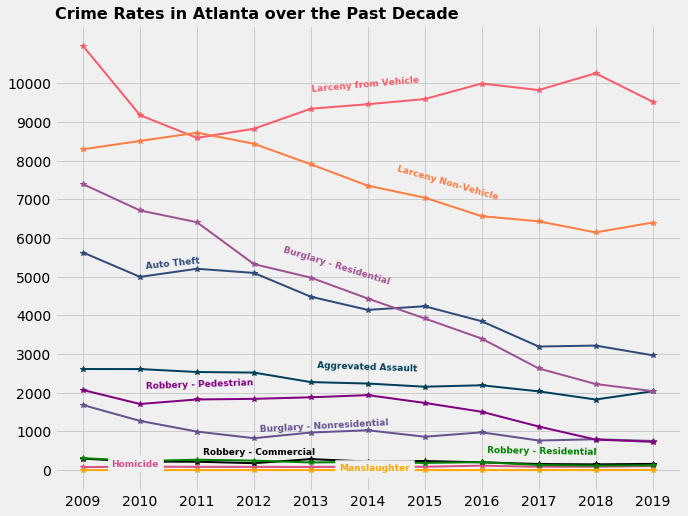

In [24]:
# Playing with loop to generate both lines and labels
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 8))
plt.backgroundcolor = '#f0f0f0'

# Creating line plots
plot_points = []

crimes = crime_year.columns

colors_array = ['#003f5c','#2f4b7c','#665191','#a05195',
          '#d45087','#f95d6a','#ff7c43','#ffa600', 
          'black', 'purple', 'green']

for crime, color in zip(crimes, colors_array):
    points = plt.plot(crime_year[crime], marker='*', color = color, lw=2)
    plot_points.append(points)

plot_points;

# Title, Axes
plt.title ("Crime Rates in Atlanta over the Past Decade",
          fontsize = 16,
          fontweight = 'bold', 
          loc = 'left');

plt.xticks(range(2009, 2020, 1 ))
plt.yticks(range(0, 11000, 1000))

#Sometimes shows up and somethimes does not. 
plt.xlabel = ('Years')
plt.ylabel = ('Arrests')

#Labeling Lines
text = []

x_coordinates = [2013.1, 2010.1, 2012.1, 2012.5, 2009.5, 2013, 2014.5, 2013.5, 2011.1, 2010.1, 2016.1]
y_coordinates = [2550, 5200, 1000, 4800, 100, 9800, 7000, -10, 400, 2100, 400]
labels = ['Aggrevated Assault', 'Auto Theft', 'Burglary - Nonresidential', 
          'Burglary - Residential', '', 'Larceny from Vehicle', 'Larceny Non-Vehicle', 
          '', 'Robbery - Commercial', 'Robbery - Pedestrian', 'Robbery - Residential']
rotations = [-2, 6, 3, -17, 0, 5, -16, 0, 0, 2, -1]


for x, y, label, color, rotation in zip(x_coordinates, y_coordinates, labels, colors_array, rotations):
  position = plt.text(x = x, y = y, s = label , color = color, fontsize = 9, weight = 'bold', rotation = rotation)
  text.append(position)

text;

#Two Other Labels
plt.text(x = 2009.5, y = 100, s = 'Homicide', color = colors_array[4], 
         fontsize = 9,  weight = 'bold', backgroundcolor = '#f0f0f0', rotation = 0)
plt.text(x = 2013.5, y = -15, s = 'Manslaughter', color = colors_array[7], 
         fontsize = 9,  weight = 'bold', backgroundcolor = '#f0f0f0', rotation = 0 )


plt.show()

All crimes have been on a downward trajectory except for vehicle larceny, auto theft, and nonresidential burglary. We will look at these areas closer later. 

#### Finding out if time of year affects crime type

In [25]:
cut_points = [0, 3, 6, 9, 12]
label_names = ['0-3','4-6','7-9','10-12']
arrests['months_categories'] = pd.cut(arrests['Occur_Month'], cut_points, labels=label_names)
arrests['months_categories'].value_counts()

7-9      91848
10-12    88461
4-6      87759
0-3      74846
Name: months_categories, dtype: int64

In [26]:
specific_months = pd.crosstab(arrests['Occur_Year'], arrests['months_categories']).drop([1916, 1920, 1970, 1973, 1976,	1979, 1980,	1991, 
                                    1993, 2000, 2001, 2003, 2004, 2005, 2006, 2007,2008])
specific_months = specific_months.T
specific_months

Occur_Year          2009  2010  2011  2012  2013  2014  2015  2016  2017  \
months_categories                                                          
0-3                 9097  7377  7195  7281  7451  6617  6662  6459  5570   
4-6                10180  9269  9253  8658  8475  7723  7711  7235  6477   
7-9                10146  9518  9599  8986  8722  8275  8187  7922  7079   
10-12               9903  9365  8805  8457  7750  8500  7498  7390  7260   

Occur_Year         2018  2019  
months_categories              
0-3                5812  5267  
4-6                6419  6323  
7-9                6622  6744  
10-12              6758  6519

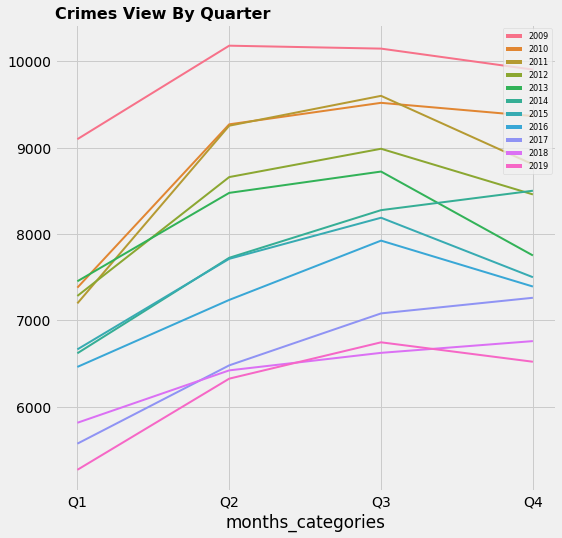

In [27]:
#Plot figure
plt.figure(figsize = (8, 8))
ax = sns.lineplot(data = specific_months, hue = 'Occur_year', dashes= False, legend='brief', lw = 2)
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), shadow=True, ncol=1, fontsize = 11)

# Title, Axes
plt.title ("Crimes View By Quarter",
          fontsize = 16,
          fontweight = 'bold', 
          loc = 'left')


plt.xticks(np.arange(4), ('Q1', 'Q2', 'Q3', 'Q4'))
      

plt.legend(fontsize = 8, 
           loc = 'upper right')

plt.show()

In this chart you can see that there is a rise in crime during the warmer months. 2014 and 2017 are the only ones that are an exception to this rule, both of these years crime increased in the later part of the year.

### Time 

#### Looking at Crime in 2019

Creating a plotly.scatter_mapbox of crime in Atlanta for 2019

In [28]:
!pip install chart_studio
import chart_studio

In [29]:
condition = arrests['Occur_Year'] == 2019
crime_2019 = arrests[condition]
crime_2019

Report Date Occur Date Occur Time   Beat  \
317884  2019-01-01 2019-01-01       0100  401.0   
317890  2019-01-01 2019-01-01       0020  511.0   
317891  2019-01-01 2019-01-01       0120  511.0   
317892  2019-01-01 2019-01-01       1740  411.0   
317895  2019-01-01 2019-01-01       0400  512.0   
...            ...        ...        ...    ...   
342909  2019-12-31 2019-12-31       2030  105.0   
342910  2019-12-31 2019-12-31        432  206.0   
342911  2019-12-31 2019-12-31        920  404.0   
342912  2019-12-31 2019-12-31       1853  404.0   
342913  2019-12-31 2019-12-31       2045  406.0   

                               Location Shift Occurence Location Type  \
317884               1384 LUCILE AVE SW   Morning Watch            20   
317890           50 UPPER ALABAMA ST SW   Morning Watch            13   
317891                      20 BROAD ST   Morning Watch           NaN   
317892  3000 CONTINENTAL COLONY PKWY SW   Evening Watch            26   
317895               253 TRINITY AVE SW   Morning Watch            18   
...                                 ...             ...           ...   
342909                1385 SHARON ST NW   Morning Watch            20   
342910                  262 PHARR RD NE   Morning Watch           NaN   
342911               689 CASCADE AVE SW       Day Watch            18   
342912               763 CASCADE AVE SW   Evening Watch            26   
342913                 237 PEYTON PL SW   Evening Watch            20   

                 UCR Literal  UCR # IBR Code         Neighborhood NPU  \
317884  LARCENY-FROM VEHICLE    640     2305             Westview   T   
317890   LARCENY-NON VEHICLE    620     2302             Downtown   M   
317891   LARCENY-NON VEHICLE    620     2302             Downtown   M   
317892   LARCENY-NON VEHICLE    620     2302           Greenbriar   R   
317895  LARCENY-FROM VEHICLE    640     2305             Downtown   M   
...                      ...    ...      ...                  ...  ..   
342909           AGG ASSAULT    420    1315K         Hunter Hills   K   
342910           AGG ASSAULT    410     1314     Buckhead Village   B   
342911           AGG ASSAULT    410     1314             Westview   T   
342912           AGG ASSAULT    410     1314             Westview   T   
342913           AGG ASSAULT    410     1314  Cascade Avenue/Road   S   

        Latitude  Longitude  Occur_Year  Occur_Month months_categories  
317884  33.74209  -84.43313        2019            1               0-3  
317890  33.75194  -84.38964        2019            1               0-3  
317891  33.75312  -84.39208        2019            1               0-3  
317892  33.68077  -84.49370        2019            1               0-3  
317895  33.75082  -84.39615        2019            1               0-3  
...          ...        ...         ...          ...               ...  
342909  33.75486  -84.43287        2019           12             10-12  
342910  33.83732  -84.37860        2019           12             10-12  
342911  33.73636  -84.43680        2019           12             10-12  
342912  33.73483  -84.43750        2019           12             10-12  
342913  33.72518  -84.45013        2019           12             10-12  

[24853 rows x 17 columns]

In [30]:
fig = px.scatter_mapbox(crime_2019, lat='Latitude', lon='Longitude', color='UCR Literal', opacity=1.0)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

#### Creating Interactive Plotly Graph

In [31]:
# import chart_studio.plotly as py
# py.plot(fig, filename = 'crime_2019', auto_open=True)

In [32]:
import plotly.io as pio
pio.write_html(fig, file = 'index.html', auto_open=False)

In [33]:
import chart_studio.tools as tls
tls.get_embed('https://plot.ly/~jiobu/1/') #change to your url

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~jiobu/1.embed" height="525" width="100%"></iframe>'

Source:https://towardsdatascience.com/how-to-create-a-plotly-visualization-and-embed-it-on-websites-517c1a78568b

#### Time of Day
For 2019 sample data, looking how time of day affects the types of crimes that occur. 

In [34]:
crime_2019['Occur Time'].value_counts()

1800    465
2000    444
1200    439
1900    431
1700    396
       ... 
2111      1
0511      1
0143      1
0446      1
0107      1
Name: Occur Time, Length: 2347, dtype: int64

Tried several methods to sort this column. This column has a dtype of object, so first I tried to convert to an hours and minutes format using the pd.to_date(crime_2019['Occur Time'], unit = 'm').dt.strftime('%H:%M'). This converted the the column into hours and minute but unfortunately, I was unable to sort this colum. Therefore, I did the next best thing and changed the column into an integers so that this column could be sorted and used for further exploration. 

In [35]:
crime_2019['Occur Time'].dtype

dtype('O')

In [36]:
crime_2019 = crime_2019.copy()

In [37]:
crime_2019['Occur Time'] = crime_2019['Occur Time'].astype(int)

In [38]:
crime_2019['Occur Time'].dtype

dtype('int64')

In [39]:
cut_points = [0, 1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300]
label_names = ['12:00am', '1:00am','2:00am','3:00am','4:00am', '5:00am', '6:00am', '7:00am','8:00am','9:00am','10:00am', '11:00am', '12:00pm', '1:00pm','2:00pm','3:00pm','4:00pm', '5:00pm', '6:00pm', '7:00pm','8:00pm','9:00pm','10:00pm', '11:00pm']
crime_2019['time_categories'] = pd.cut(crime_2019['Occur Time'], cut_points, labels=label_names)
crime_2019['time_categories'].value_counts()

8:00pm     1662
7:00pm     1661
6:00pm     1550
10:00pm    1497
9:00pm     1488
5:00pm     1389
11:00pm    1360
4:00pm     1286
3:00pm     1227
12:00pm    1223
2:00pm     1100
1:00pm     1058
1:00am      925
11:00am     915
10:00am     769
8:00am      754
2:00am      672
9:00am      659
3:00am      649
4:00am      461
7:00am      430
5:00am      419
6:00am      414
12:00am     159
Name: time_categories, dtype: int64

In [40]:
fig = px.histogram(crime_2019, x = "time_categories", color="UCR Literal", marginal = 'rug')
fig.update_xaxes({'categoryorder':'array', 'categoryarray':['12:00am', '1:00am','2:00am','3:00am','4:00am', '5:00am', '6:00am', '7:00am','8:00am','9:00am','10:00am', '11:00am', '12:00pm', '1:00pm','2:00pm','3:00pm','4:00pm', '5:00pm', '6:00pm', '7:00pm','8:00pm','9:00pm','10:00pm', '11:00pm']})
fig.show()

#### GeoPandas 
Looking at times of crime by neighborhood

In [41]:
!conda clean --index-cache
!conda install -y -c conda-forge cartopy
!pip install fiona
!conda install -y -c ioos geopandas

Solving environment: done

## Package Plan ##

  environment location: /Users/jisha/opt/anaconda3

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cartopy-0.17.0             |py37h929c6f0_1004         1.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.8 MB

The following packages will be UPDATED:

  cartopy            pkgs/main::cartopy-0.17.0-py37haea56e~ --> conda-forge::cartopy-0.17.0-py37h929c6f0_1004



cartopy-0.17.0       | 1.8 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.



In [42]:
import cartopy.crs as ccrs 
import cartopy 
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

import geopandas as gp
import shapely
from shapely.geometry import Point, Polygon

In [43]:
# street_map = gp.read_file()

# atlanta_shape = shape[shape["Name"] == "Atlanta"]

# atlanta_shape.plot()

# plt.show()
# plt.ion()

In [ ]:
# def within_shape(df, shapes):
#     in_shape = []
#     for sh in shapes.geometry:
#         within = df.within(sh)
#         in_shape.append(within)
#     return in_shape


# print(within_shape(Point(33.751079, -84.443274), atlanta_shape))

### Neighorhood

#### Crime by neighborhoods

In [44]:
# Too many neighborhoods to evaluate
# Will look at top 10

In [45]:
arrests['Neighborhood'].value_counts()[:10]

Downtown           25386
Midtown            18240
Old Fourth Ward     9945
West End            8506
Lenox               6203
North Buckhead      5651
Vine City           5506
Greenbriar          5487
Sylvan Hills        5451
Grant Park          5293
Name: Neighborhood, dtype: int64

In [46]:
areas = arrests['Neighborhood'].unique()
list_to_remove = ['Downtown','Midtown','Old Fourth Ward','West End','Lenox',
                  'North Buckhead ', 'Greenbriar','Vine City', 'Sylvan Hills',
                  'Grant Park']

final_list= list(set(areas).difference(set(list_to_remove)))
final_list.pop(0)
final_list.remove('North Buckhead')
final_list;

In [47]:
#Checking that the top 10 neighborhoods are not in the final list to be deleted.
'Vine City' in final_list

False

In [48]:
neighborhood = pd.crosstab(arrests['Neighborhood'], arrests['Occur_Year'])
neighborhood = neighborhood.drop(final_list);

In [49]:
neighborhood = neighborhood.T.drop([1916, 1920, 1970, 1973, 1976, 1979, 1980, 1991, 
                                    1993, 2000, 2001, 2003, 2004, 2005, 2006, 2007, 2008])
neighborhood

Neighborhood  Downtown  Grant Park  Greenbriar  Lenox  Midtown  \
Occur_Year                                                       
2009              3156         570         652    794     2224   
2010              2579         602         564    645     1760   
2011              2660         563         543    569     1705   
2012              2203         516         556    546     1589   
2013              2344         540         576    550     1801   
2014              2389         526         522    522     1715   
2015              2262         424         416    624     1521   
2016              1824         441         522    518     1309   
2017              1814         352         427    520     1402   
2018              2127         357         377    457     1528   
2019              2000         393         331    452     1664   

Neighborhood  North Buckhead  Old Fourth Ward  Sylvan Hills  Vine City  \
Occur_Year                                                               
2009                     582             1195           574        524   
2010                     592             1032           576        423   
2011                     433             1199           628        376   
2012                     543             1080           558        449   
2013                     540              947           523        534   
2014                     493              879           498        638   
2015                     427              815           520        658   
2016                     544              784           501        595   
2017                     477              694           375        360   
2018                     536              566           360        506   
2019                     479              736           332        441   

Neighborhood  West End  
Occur_Year              
2009               859  
2010              1030  
2011               956  
2012               838  
2013               906  
2014               814  
2015               800  
2016               681  
2017               574  
2018               537  
2019               504

According to this chart you can see that 3 out of these top 10 neighborhoods have seen a surge in crime in 2019 -  Grant Park, Midtown and Old Fourth Ward. 

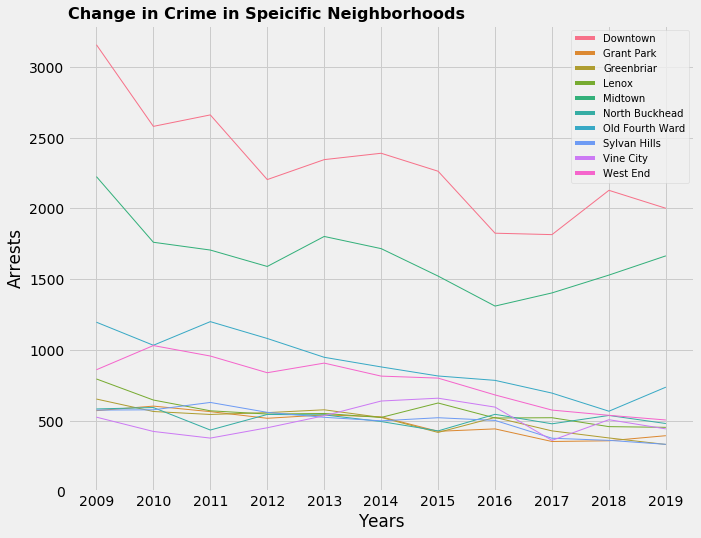

In [50]:
#Plot figure
plt.figure(figsize = (10, 8))
ax = sns.lineplot(data = neighborhood, hue = 'Neighborhood', dashes= False, legend='brief', lw = 1)
plt.legend(fontsize = 10,  loc = 'best')

# Title, Axes
plt.title ("Change in Crime in Speicific Neighborhoods",
          fontsize = 16,
          fontweight = 'bold', 
          loc = 'left');

plt.xticks(range(2009, 2020, 1 ))
plt.yticks(range(0, 3500, 500))

#Sometimes shows up and somethimes does not. 
ax.set(xlabel='Years', ylabel='Arrests')

plt.show()

#### Further Analysis of Crime 
Looking specifically at neighborhoods where crime has risen in the last year. 

In [60]:
condition = (arrests['Neighborhood']=='Grant Park')|(arrests['Neighborhood']=='Midtown') | (arrests['Neighborhood']=='Old Fourth Ward')
rise = arrests[condition]
rise.head()

Report Date Occur Date Occur Time   Beat                       Location  \
15  2009-01-01 2009-01-01        900  604.0              626 DEKALB AVE SE   
16  2009-01-01 2008-12-31       1915  503.0                  422 9TH ST NE   
18  2009-01-01 2008-12-31       1700  502.0                188 14TH STREET   
19  2009-01-01 2008-12-29       1700  614.0              897 MONROE CIR NE   
25  2009-01-01 2009-01-01       1200  505.0  6TH ST NE / W PEACHTREE ST NE   

   Shift Occurence Location Type           UCR Literal  UCR # IBR Code  \
15       Day Watch            18  LARCENY-FROM VEHICLE    640     2305   
16       Day Watch            13  LARCENY-FROM VEHICLE    640     2305   
18       Day Watch            18  LARCENY-FROM VEHICLE    640     2305   
19       Day Watch            13  LARCENY-FROM VEHICLE    640     2305   
25   Evening Watch            13  LARCENY-FROM VEHICLE    640     2305   

       Neighborhood NPU  Latitude  Longitude  Occur_Year  Occur_Month  \
15  Old Fourth Ward   M  33.75283  -84.36687        2009            1   
16          Midtown   E  33.78080  -84.37334        2008           12   
18          Midtown   E  33.78663  -84.38139        2008           12   
19          Midtown   E  33.77917  -84.36851        2008           12   
25          Midtown   E  33.77754  -84.38730        2009            1   

   months_categories  
15               0-3  
16             10-12  
18             10-12  
19             10-12  
25               0-3

In [61]:
#Calculating  specific crimes by years
rise_crime = pd.crosstab(rise['Occur_Year'], rise['UCR Literal'])
rise_crime  = rise_crime.drop([1916, 1976, 1993, 2004, 2007, 2008])
rise_crime

UCR Literal  AGG ASSAULT  AUTO THEFT  BURGLARY-NONRES  BURGLARY-RESIDENCE  \
Occur_Year                                                                  
2009                 163         527              146                 319   
2010                 157         409              117                 302   
2011                 170         440               60                 269   
2012                 136         392               86                 213   
2013                 137         369               72                 195   
2014                 107         356               95                 196   
2015                 124         341               60                 211   
2016                 112         231               96                 169   
2017                 102         236               63                  96   
2018                  97         296               55                 108   
2019                 111         260               67                 123   

UCR Literal  HOMICIDE  LARCENY-FROM VEHICLE  LARCENY-NON VEHICLE  \
Occur_Year                                                         
2009                4                  1844                  764   
2010                6                  1445                  750   
2011                6                  1415                  888   
2012                6                  1313                  832   
2013                6                  1536                  773   
2014                2                  1499                  673   
2015                2                  1257                  598   
2016                5                  1150                  637   
2017                2                  1136                  700   
2018                4                  1198                  622   
2019                9                  1425                  706   

UCR Literal  ROBBERY-COMMERCIAL  ROBBERY-PEDESTRIAN  ROBBERY-RESIDENCE  
Occur_Year                                                              
2009                         29                 179                 14  
2010                         18                 173                 17  
2011                         17                 174                 28  
2012                         12                 175                 20  
2013                         32                 157                 11  
2014                         18                 158                 16  
2015                         23                 135                  9  
2016                         13                 113                  8  
2017                          8                  96                  9  
2018                          8                  52                 11  
2019                         19                  64                  9

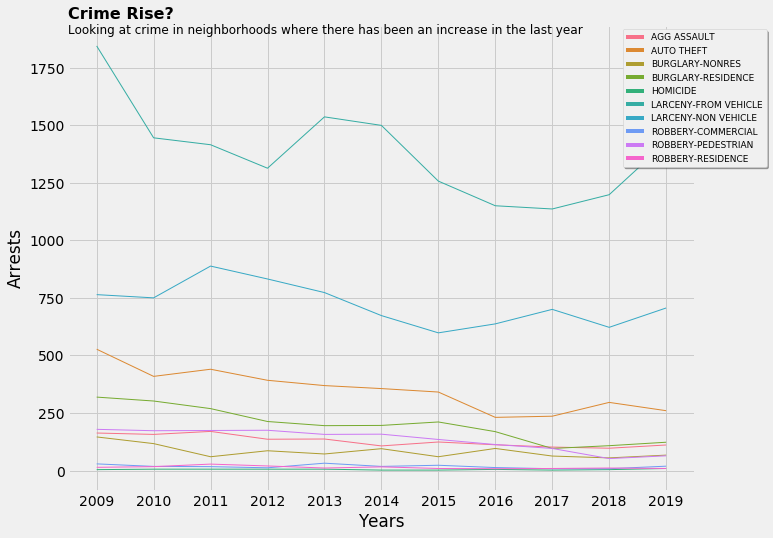

In [68]:
plt.figure(figsize = (10, 8))
ax = sns.lineplot(data = rise_crime, dashes= False, legend='brief', lw = 1)
ax.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1, fontsize = 9)

# Title, Axes
plt.title ("Change in Crime in Speicific Neighborhoods",
          fontsize = 16,
          fontweight = 'bold', 
          loc = 'left');

plt.xticks(range(2009, 2020, 1 ))
plt.yticks(range(0, 1800, 250))

#Sometimes shows up and somethimes does not. 
ax.set(xlabel='Years', ylabel='Arrests')

# Title, Axes
plt.title ("Crime Rise?",
          fontsize = 16,
          fontweight = 'bold', 
          loc = 'left');

plt.text (x = 2008.5, y = 1900,  s = 'Looking at crime in neighborhoods where there has been an increase in the last year', 
          color = 'black', fontsize = 12)

plt.show ()

According to the graph, 8 out of the 10 reported crimes have increased in these neighborhoods in the past year. 

In [83]:
top_10 = arrests['Neighborhood'].value_counts()[:10].index.tolist()
top_10

['Downtown',
 'Midtown',
 'Old Fourth Ward',
 'West End',
 'Lenox',
 'North Buckhead',
 'Vine City',
 'Greenbriar',
 'Sylvan Hills',
 'Grant Park']

In [100]:
top_10_sample = arrests['Neighborhood'].isin(['Downtown','Midtown','Old Fourth Ward','West End',
                                             'Lenox','North Buckhead','Vine City','Greenbriar',
                                             'Sylvan Hills','Grant Park'])
years = arrests['Occur_Year'].isin([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
sample = arrests[top_10_sample][years]
sample

/Users/jisha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Report Date Occur Date Occur Time   Beat                 Location  \
0       2009-01-01 2009-01-01       1145  411.0     2841 GREENBRIAR PKWY   
1       2009-01-01 2009-01-01       1330  511.0           12 BROAD ST SW   
3       2009-01-01 2009-01-01       1450  210.0     3393 PEACHTREE RD NE   
4       2009-01-01 2009-01-01       1600  411.0  2841 GREENBRIAR PKWY SW   
7       2009-01-01 2009-01-01       1627  210.0        3393 PEACHTREE RD   
...            ...        ...        ...    ...                      ...   
342897  2019-12-31 2019-12-30       1830  505.0           323 7TH ST NE    
342899  2019-12-31 2019-12-30       2100  614.0        892 VEDADO WAY NE   
342900  2019-12-31 2019-12-30       2300  614.0  845 CHARLES ALLEN DR NE   
342902  2019-12-31 2019-12-31       1020  503.0     1080 PEACHTREE ST NE   
342906  2019-12-31 2019-12-31       2130  503.0      992 PEACHTREE ST NE   

       Shift Occurence Location Type           UCR Literal  UCR # IBR Code  \
0            Day Watch             8   LARCENY-NON VEHICLE    630     2303   
1            Day Watch             9   LARCENY-NON VEHICLE    630     2303   
3        Evening Watch             8   LARCENY-NON VEHICLE    630     2303   
4              Unknown             8   LARCENY-NON VEHICLE    630     2303   
7        Evening Watch             8   LARCENY-NON VEHICLE    630     2303   
...                ...           ...                   ...    ...      ...   
342897       Day Watch            13  LARCENY-FROM VEHICLE    640     2305   
342899       Day Watch            13  LARCENY-FROM VEHICLE    640     2305   
342900       Day Watch            13  LARCENY-FROM VEHICLE    640     2305   
342902       Day Watch            13  LARCENY-FROM VEHICLE    640     2305   
342906   Evening Watch            13  LARCENY-FROM VEHICLE    640     2305   

       Neighborhood NPU  Latitude  Longitude  Occur_Year  Occur_Month  \
0        Greenbriar   R  33.68845  -84.49328        2009            1   
1          Downtown   M  33.75320  -84.39201        2009            1   
3             Lenox   B  33.84676  -84.36212        2009            1   
4        Greenbriar   R  33.68677  -84.49773        2009            1   
7             Lenox   B  33.84676  -84.36212        2009            1   
...             ...  ..       ...        ...         ...          ...   
342897      Midtown   E  33.77823  -84.37971        2019           12   
342899      Midtown   E  33.77891  -84.37143        2019           12   
342900      Midtown   E  33.77784  -84.37266        2019           12   
342902      Midtown   E  33.78409  -84.38353        2019           12   
342906      Midtown   E  33.78192  -84.38410        2019           12   

       months_categories  
0                    0-3  
1                    0-3  
3                    0-3  
4                    0-3  
7                    0-3  
...                  ...  
342897             10-12  
342899             10-12  
342900             10-12  
342902             10-12  
342906             10-12  

[95564 rows x 17 columns]

In [101]:
neighborhood1 = pd.crosstab(sample['Occur_Year'], sample['Neighborhood'])
neighborhood1


Neighborhood  Downtown  Grant Park  Greenbriar  Lenox  Midtown  \
Occur_Year                                                       
2009              3156         570         652    794     2224   
2010              2579         602         564    645     1760   
2011              2660         563         543    569     1705   
2012              2203         516         556    546     1589   
2013              2344         540         576    550     1801   
2014              2389         526         522    522     1715   
2015              2262         424         416    624     1521   
2016              1824         441         522    518     1309   
2017              1814         352         427    520     1402   
2018              2127         357         377    457     1528   
2019              2000         393         331    452     1664   

Neighborhood  North Buckhead  Old Fourth Ward  Sylvan Hills  Vine City  \
Occur_Year                                                               
2009                     582             1195           574        524   
2010                     592             1032           576        423   
2011                     433             1199           628        376   
2012                     543             1080           558        449   
2013                     540              947           523        534   
2014                     493              879           498        638   
2015                     427              815           520        658   
2016                     544              784           501        595   
2017                     477              694           375        360   
2018                     536              566           360        506   
2019                     479              736           332        441   

Neighborhood  West End  
Occur_Year              
2009               859  
2010              1030  
2011               956  
2012               838  
2013               906  
2014               814  
2015               800  
2016               681  
2017               574  
2018               537  
2019               504

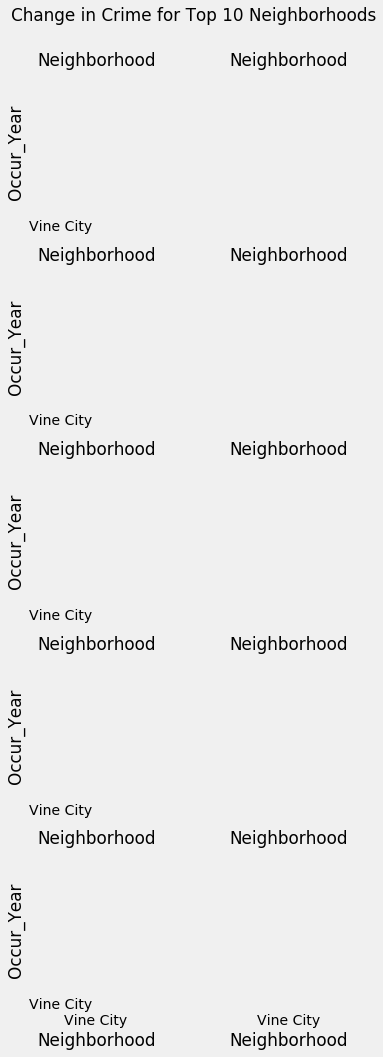

In [116]:
# Create a grid : initialize it
g = sns.FacetGrid(sample, col='Neighborhood', hue='Neighborhood', col_wrap=2, )
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'Occur_Year', 'Neighborhood')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'Neighborhood', 'Occur_Year', alpha=0.2).set_titles('Neighborhood')
 
# Control the title of each facet
g = g.set_titles('Neighborhood')
 
# Add a title for the whole plo
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Change in Crime for Top 10 Neighborhoods')
 
plt.show()
